# CE282: Linear Algebra

## Final Project

Full Name: \<fatemeh khojasteh\>

Student ID: \<99170394\>


## Q2: Image Processing (100 Points)

# Introduction 

In this exercise, we are going to examine two applications of the basis shift tools that were discussed in class (SVD and FFT) in digital image processing.


One of the issues we are investigating is image compression. For this purpose, in general, the information inside the image can be considered as a data matrix, then, in a way, suitable bases for this information matrix are found. The primary image is displayed with less information by depicting the primary matrix on a more important basis and keeping the necessary information. Data and compression in practice. For the sake of simplicity, the images we are considering in this exercise are considered black and white. Still, the methods under consideration can be implemented simply and by changing the shape of the tensors of multi-channel (color) images.


With the help of SVD, we can find bases for the column space of the matrix of our desired image on which the columns of our image have the highest correlation. From the point of view of these bases in the descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only $r$ initial columns of the found bases ($U$) along with the combined vectors ($V^T$) and singular values ($\Sigma$) corresponding to them, we can keep a good approximation of the general image. From the expert point of view, the reconstruction that has been done is actually a kind of reconstruction of the primary matrix in the lower order (rank approximation) that you were familiar with before. The amount of

In this view, $r$ is the control valve for the amount of compression we want.


With the help of FFT and Fourier transform, we can also consider the information in the rows and columns of our image matrix as two-dimensional discrete signal values and image it in the space of two-dimensional fundamental and periodic wave bases. It can be shown that the larger size of the image vector in the direction of a certain wave means the greater importance of that wave in the formation of patterns in the image ([Read more](https://en.wikipedia.org/wiki/Parseval%27s_identity)), so keeping $r$ of the basic wave in which the size of the image vector is the largest in their direction can be used to reconstruct the image information. For image compression, a good approximation should be used. In this view, the $r$ value of the control valve will be the compression rate we want.


Another issue that we can explore with a similar idea of applying the described base transform is image denoising. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image, from the point of view of SVD, according to the examination of the general information, the direction of the image vector based on bases with more singular values has not changed much, and the information related to the vectors having less importance can remove noise and keep the original information of the image. From the point of view of FFT, considering that the noise pattern is generally modeled with high-frequency waves, keeping the constitutive waves containing the lower frequency in the image can separate the image information from the noise (this is called low-pass filtering).

## 0. Prerequisites and Imports

Install the required packages (if not already installed):

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pillow  # for manipulating image files


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import PIL
from PIL import Image

# Display inputs

In the following cell, you have to display the images. The input images are in the directory of `./images`.

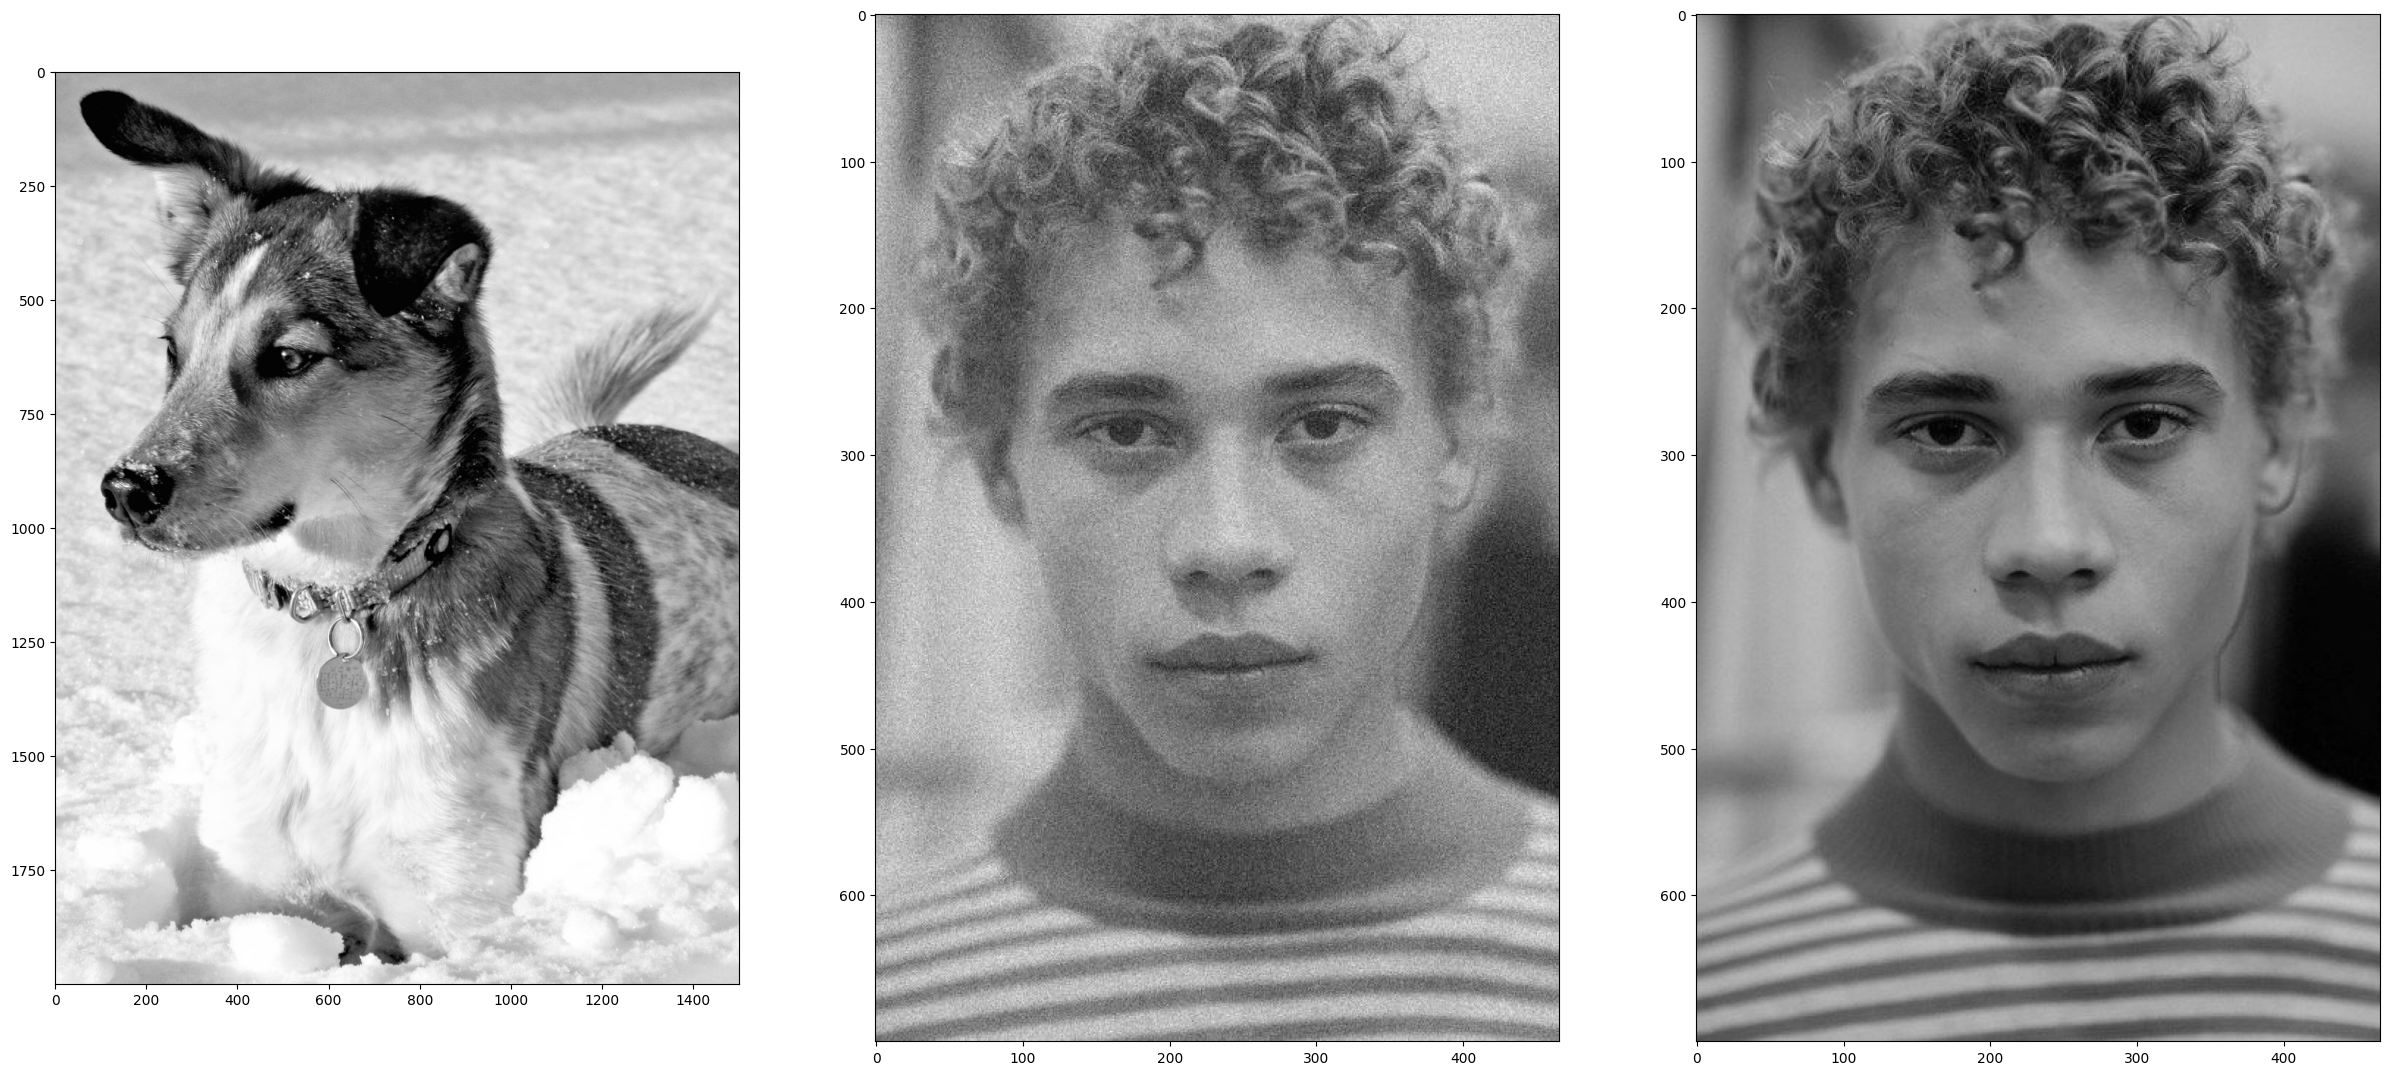

In [2]:
from matplotlib import pyplot as plt
from PIL import Image

rows = 1
columns = 3
plt.figure(figsize=(30, 30))

plt.subplot(rows, columns, 1)
img0 = Image.open('images/dog.jpg').convert('LA')
plt.imshow(img0)

plt.subplot(rows, columns, 2)
img1 = Image.open('images/noisy.jpg').convert('LA')
plt.imshow(img1)

plt.subplot(rows, columns, 3)
img2 = Image.open('images/original.JPG').convert('LA')
plt.imshow(img2)

plt.show()

# 1. Image Compression
Using SVD (you can use `np.linalg.svd`) and 2D-FFT (which will be explained in details later), Compress the `original.jpg` image with compression rates of $0.1$, $0.5$, $1$, $5$ and $10$%. Then visualize the resulting compressed images of the two algorithms against one another and investigate each basis change's effectiveness in capturing more meaningful patterns of images.

The 2D Fourier transform of a data matrix can be achieved by ﬁrst applying the 1D Fourier transform to every row of the matrix, and then applying the 1D Fourier transform to every column of the intermediate matrix. This process is depicted below. `np.fft.fft2` applys a 2D Fourier transformation to the provided matrix by employing the Fast Fourier Transformation algorithm.

<img style="margin: auto;" width="45%" src="./samples/2dfft.png">

The Fourier coefficients are zero-centered by definition, and although it does not affect the result of the transformation followed by its inverse, in general, it is more convenient to have them centered around the middle point of the transformation matrix. `np.fft.fftshift` does the described shift two a provided Discrete-Fourier transformation matrix.

Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/compression.jpg">

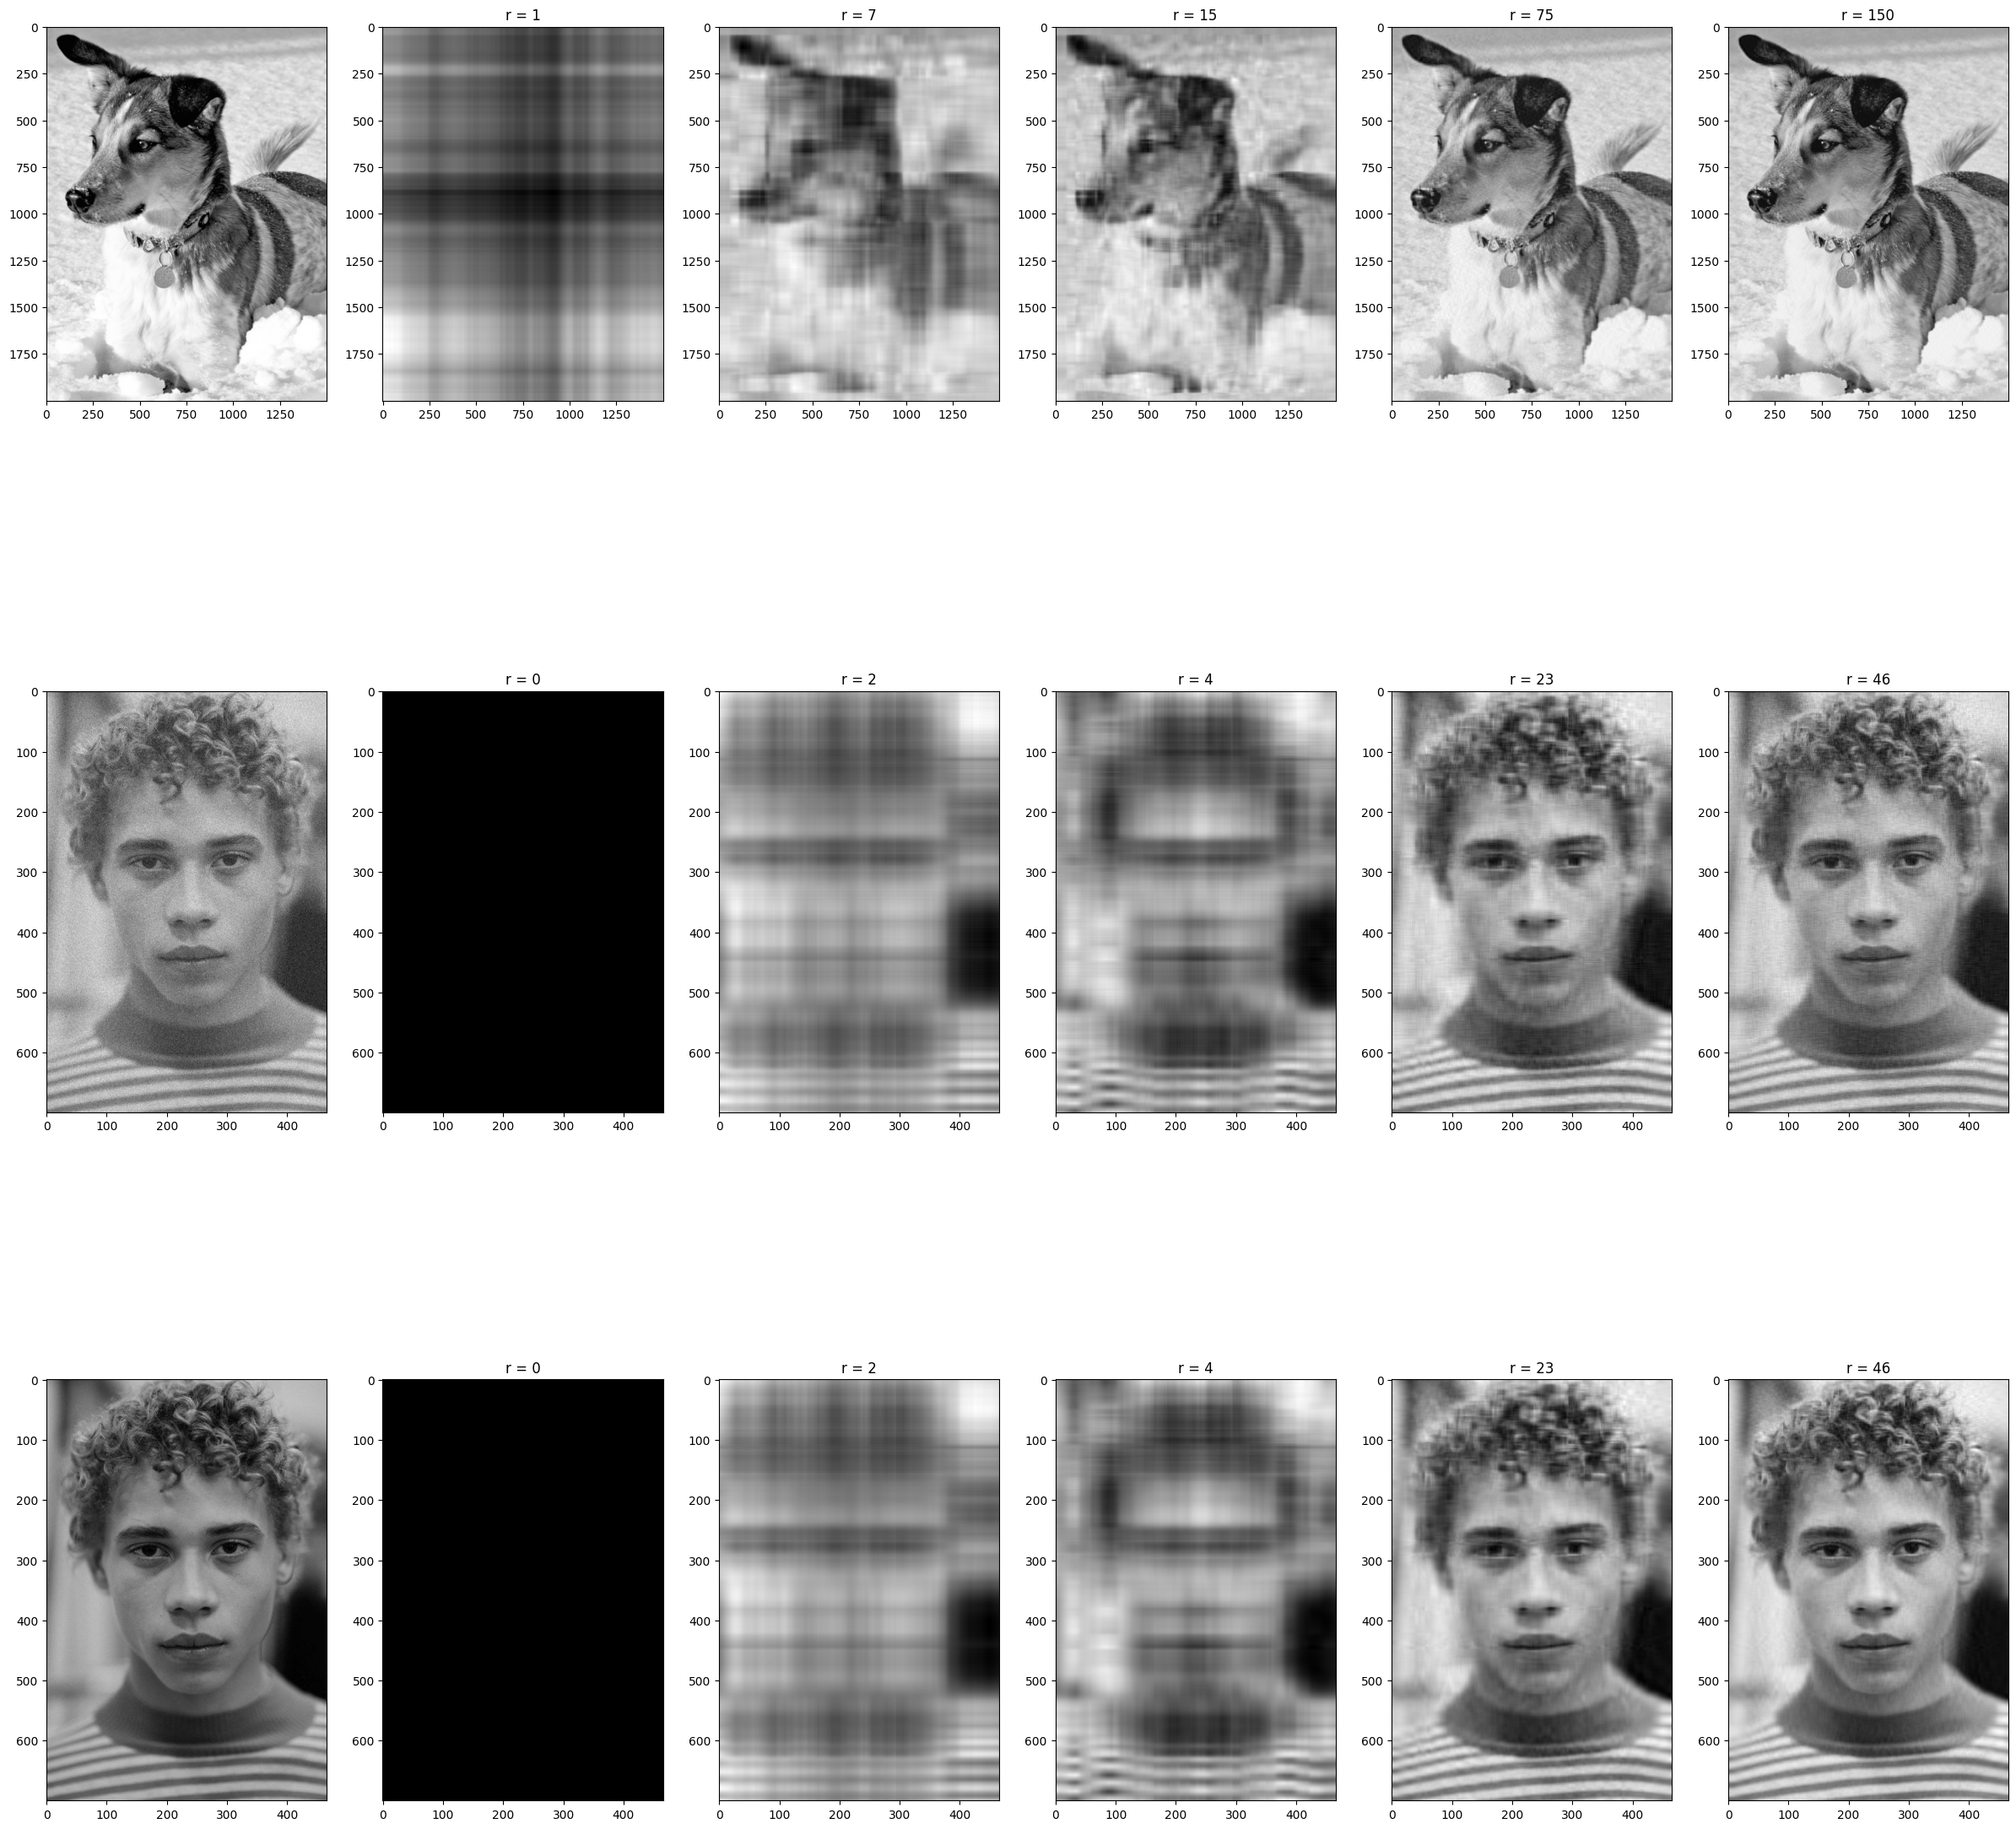

In [4]:
import numpy as np
# use svd with different compress rates and display each output result
rows = 3
columns = 6
plt.figure(figsize=(30, 30))
plt.subplot(rows, columns, 1)
img = Image.open('images/dog.jpg').convert('LA')
plt.imshow(img)
plt.subplot(rows, columns, 7)
plt.imshow(img1)
plt.subplot(rows, columns, 13)
plt.imshow(img2)

imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)

U, sigma, V = np.linalg.svd(imgmat)

imgmat1 = np.array(list(img1.getdata(band=0)), float)
imgmat1.shape = (img1.size[1], img1.size[0])
imgmat1 = np.matrix(imgmat1)

U1, sigma1, V1 = np.linalg.svd(imgmat1)

imgmat2 = np.array(list(img2.getdata(band=0)), float)
imgmat2.shape = (img2.size[1], img2.size[0])
imgmat2 = np.matrix(imgmat2)

U2, sigma2, V2 = np.linalg.svd(imgmat2)

reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.subplot(rows, columns, 2)
plt.imshow(reconstimg, cmap='gray')
title = "r = %s" % 1
plt.title(title)

reconstimg = np.matrix(U[:, :7]) * np.diag(sigma[:7]) * np.matrix(V[:7, :])
plt.subplot(rows, columns, 3)
plt.imshow(reconstimg, cmap='gray')
title = "r = %s" % 7
plt.title(title)

reconstimg = np.matrix(U[:, :15]) * np.diag(sigma[:15]) * np.matrix(V[:15, :])
plt.subplot(rows, columns, 4)
plt.imshow(reconstimg, cmap='gray')
title = "r = %s" % 15
plt.title(title)

reconstimg = np.matrix(U[:, :75]) * np.diag(sigma[:75]) * np.matrix(V[:75, :])
plt.subplot(rows, columns, 5)
plt.imshow(reconstimg, cmap='gray')
title = "r = %s" % 75
plt.title(title)

reconstimg = np.matrix(U[:, :150]) * np.diag(sigma[:150]) * np.matrix(V[:150, :])
plt.subplot(rows, columns, 6)
plt.imshow(reconstimg, cmap='gray')
title = "r = %s" % 150
plt.title(title)

reconstimg1 = np.matrix(U1[:, :0]) * np.diag(sigma1[:0]) * np.matrix(V1[:0, :])
plt.subplot(rows, columns, 8)
plt.imshow(reconstimg1, cmap='gray')
title = "r = %s" % 0
plt.title(title)

reconstimg1 = np.matrix(U1[:, :2]) * np.diag(sigma1[:2]) * np.matrix(V1[:2, :])
plt.subplot(rows, columns, 9)
plt.imshow(reconstimg1, cmap='gray')
title = "r = %s" % 2
plt.title(title)

reconstimg1 = np.matrix(U1[:, :4]) * np.diag(sigma1[:4]) * np.matrix(V1[:4, :])
plt.subplot(rows, columns, 10)
plt.imshow(reconstimg1, cmap='gray')
title = "r = %s" % 4
plt.title(title)

reconstimg1 = np.matrix(U1[:, :23]) * np.diag(sigma1[:23]) * np.matrix(V1[:23, :])
plt.subplot(rows, columns, 11)
plt.imshow(reconstimg1, cmap='gray')
title = "r = %s" % 23
plt.title(title)

reconstimg1 = np.matrix(U1[:, :46]) * np.diag(sigma1[:46]) * np.matrix(V1[:46, :])
plt.subplot(rows, columns, 12)
plt.imshow(reconstimg1, cmap='gray')
title = "r = %s" % 46
plt.title(title)

reconstimg2 = np.matrix(U2[:, :0]) * np.diag(sigma2[:0]) * np.matrix(V2[:0, :])
plt.subplot(rows, columns, 14)
plt.imshow(reconstimg2, cmap='gray')
title = "r = %s" % 0
plt.title(title)

reconstimg2 = np.matrix(U2[:, :2]) * np.diag(sigma2[:2]) * np.matrix(V2[:2, :])
plt.subplot(rows, columns, 15)
plt.imshow(reconstimg2, cmap='gray')
title = "r = %s" % 2
plt.title(title)

reconstimg2 = np.matrix(U2[:, :4]) * np.diag(sigma2[:4]) * np.matrix(V2[:4, :])
plt.subplot(rows, columns, 16)
plt.imshow(reconstimg2, cmap='gray')
title = "r = %s" % 4
plt.title(title)

reconstimg2 = np.matrix(U2[:, :23]) * np.diag(sigma2[:23]) * np.matrix(V2[:23, :])
plt.subplot(rows, columns, 17)
plt.imshow(reconstimg2, cmap='gray')
title = "r = %s" % 23
plt.title(title)

reconstimg2 = np.matrix(U2[:, :46]) * np.diag(sigma2[:46]) * np.matrix(V2[:46, :])
plt.subplot(rows, columns, 18)
plt.imshow(reconstimg2, cmap='gray')
title = "r = %s" % 46
plt.title(title)

plt.show()

<Figure size 3000x1500 with 0 Axes>

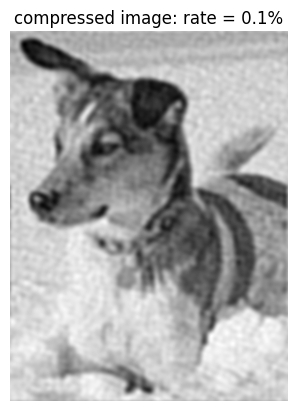

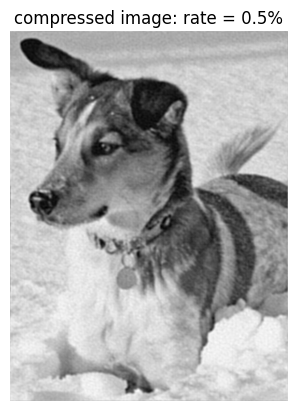

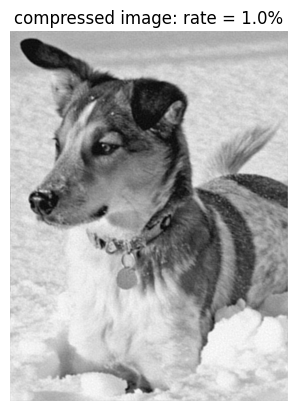

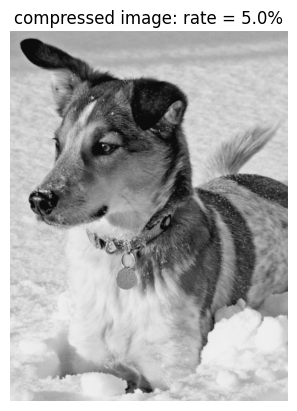

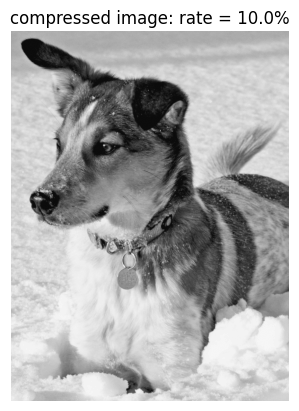

In [5]:
from scipy import fftpack

A = plt.imread('images/dog.jpg')
B = np.mean(A, axis=2)

plt.figure(figsize=(30, 15))

imgfft = np.fft.fft2(B)
imgfft = np.fft.ifftshift(np.fft.fftshift(imgfft))
imgsort = np.sort(np.abs(imgfft.flatten()))

for rate in (0.001, 0.005, 0.01, 0.05, 0.1):
    toremove = (1 - rate) * len(imgsort)
    thr = imgsort[int(toremove)]
    indice = np.abs(imgfft) > thr
    atlow = imgfft * indice
    imagelow = np.fft.ifft2(atlow).real
    plt.figure()
    plt.imshow(imagelow, cmap='gray')
    plt.axis('off')
    plt.title('compressed image: rate = ' + str(rate * 100) + '%')


Which change of basis seems to do better when it comes to image compression? Briefly elaborate on what makes that change of basis more suited for images?

Singular value decomposition (SVD) is a better choice for image compression than the Fourier transform (FFT). The SVD of an image can be used to compress the image by representing the image as a linear combination of the left and right singular vectors. The coefficients of the linear combination are the singular values. The SVD can be used to compress the image by reducing the number of singular values that are used to represent the image. The FFT is a Fourier transform that decomposes a signal into its frequency components. The FFT can be used to compress an image by representing the image as a linear combination of sine and cosine waves. The coefficients of the linear combination are the amplitudes of the sine and cosine waves. The FFT can be used to compress the image by reducing the number of frequency components that are used to represent the image.
The SVD is a better choice for image compression than the FFT because the SVD can represent images more efficiently than the FFT. The SVD can represent images with fewer coefficients than the FFT. The SVD can also represent images with less distortion than the FFT.
 SVD gives high energy compression and optimal energy compaction.
 FFT plays vital role in image processing applications such as filtering, compression and de noising by manipulating data in frequency domain. FFT is most popular in Medical Imaging applications being computationally fast and simple.

# 2. Image Denoising

Through the same process as the previous section and by empirically finding an optimal rank threshold for the SVD vectors, denoise the provided image. Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/svdd.jpg">

It is shown that SVD can be an effective denoising strategy when the underlying data is of low rank initially, but as observable from the example, raw SVD does not seem to be useful when it comes to denoising natural images.

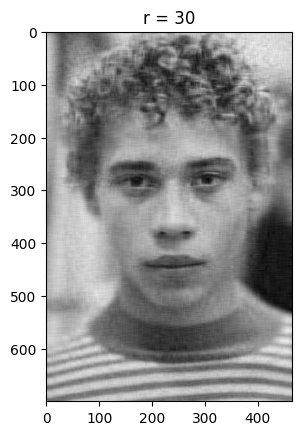

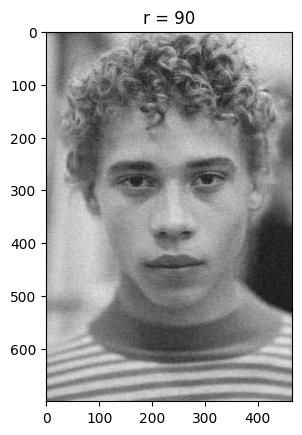

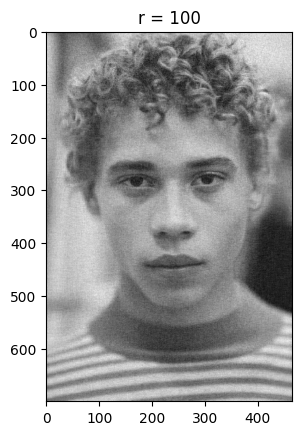

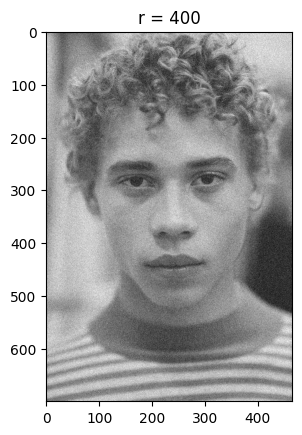

In [6]:
# Using SVD, denoise the noisy image that is in the images directory. 
# You have to try at least 3 different ranks. 
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

imgg = Image.open('images/noisy.jpg')
arr = np.array(imgg)
u, s, v = np.linalg.svd(arr, full_matrices=False)

for ratio in (30, 90, 100, 400):
    sratio = np.zeros_like(s)
    sratio[:ratio] = s[:ratio]
    output = u.dot(np.diag(sratio)).dot(v)
    newimg = Image.fromarray(output.astype(np.uint8))
    plt.imshow(newimg, cmap='gray')
    title = title = "r = %s" % ratio
    plt.title(title)
    plt.show()
# rows = 2
# columns = 4
# plt.figure(figsize=(30, 15))
# plt.subplot(rows, columns, 1)
#
# # Load the image
# Z = Image.open('C:\\Users\\Fatemeh\\PycharmProjects\\pythonProject5\\images\\Screenshot (223).jpg')
# X = Image.open('C:\\Users\\Fatemeh\\PycharmProjects\\pythonProject5\\images\\noisy.jpg')
#
# imgmat3 = np.array(list(Z.getdata(band=0)), float)
# imgmat3.shape = (Z.size[1], Z.size[0])
# imgmat3 = np.matrix(imgmat3)
#
# U3, sigma3, V3 = np.linalg.svd(imgmat3, full_matrices=False)
# reconstimg3 = np.matrix(U3[:, :120]) * np.diag(sigma3[:120]) * np.matrix(V3[:120, :])
# plt.subplot(rows, columns, 5)
# plt.imshow(reconstimg3, cmap='gray')
# title = "r = %s" % 120
# plt.title(title)
#
# imgmat4 = np.array(list(X.getdata(band=0)), float)
# imgmat4.shape = (X.size[1], X.size[0])
# imgmat4 = np.matrix(imgmat4)
#
# U4, sigma4, V4 = np.linalg.svd(imgmat4, full_matrices=False)
#
# reconstimg4 = np.matrix(U4[:, :30]) * np.diag(sigma4[:30]) * np.matrix(V4[:30, :])
# plt.subplot(rows, columns, 1)
# plt.imshow(reconstimg4, cmap='gray')
# title = "r = %s" % 30
# plt.title(title)
#
# reconstimg4 = np.matrix(U4[:, :170]) * np.diag(sigma4[:170]) * np.matrix(V4[:170, :])
# plt.subplot(rows, columns, 2)
# plt.imshow(reconstimg4, cmap='gray')
# title = "r = %s" % 170
# plt.title(title)
#
# reconstimg4 = np.matrix(U4[:, :90]) * np.diag(sigma4[:90]) * np.matrix(V4[:90, :])
# plt.subplot(rows, columns, 3)
# plt.imshow(reconstimg4, cmap='gray')
# title = "r = %s" % 90
# plt.title(title)
#
# reconstimg4 = np.matrix(U4[:, :300]) * np.diag(sigma4[:300]) * np.matrix(V4[:300, :])
# plt.subplot(rows, columns, 4)
# plt.imshow(reconstimg4, cmap='gray')
# title = "r = %s" % 300
# plt.title(title)
#
# plt.show()


The FFT is extensively used for denoising and filtering signals, as it is straightforward to isolate and manipulate particular frequency bands. It is observed that the noise is especially pronounced in high-frequency modes, therefore zero out any Fourier coefﬁcient outside of a radius containing low frequencies. You can find the approximate optimal filtering radius through trials and errors empirically. A sample denoised image is shown below:

<img style="margin: auto;" width="50%" src="./samples/fftd.jpg">

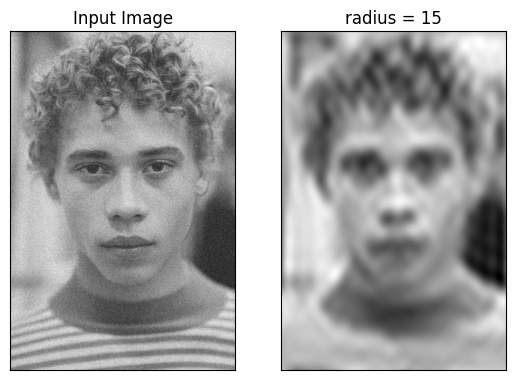

In [7]:
# Using fft, denoise the noisy image that is in the images directory. 
# You have to try at least 3 different radiuses. 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack
from scipy import ndimage

# im = plt.imread('images/noisy.jpg').astype(float)
img = Image.open('images/noisy.jpg')

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

rows, cols = dft_shift.shape
crow, ccol = rows // 2, cols // 2  # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros_like(dft_shift)
mask[crow - 15:crow + 15, ccol - 15:ccol + 15] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift).real
# img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('radius = 15'), plt.xticks([]), plt.yticks([])

plt.show()

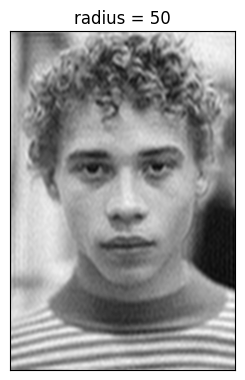

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack
from scipy import ndimage

# im = plt.imread('images/noisy.jpg').astype(float)
img = Image.open('images/noisy.jpg')

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

rows, cols = dft_shift.shape
crow, ccol = rows // 2, cols // 2  # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros_like(dft_shift)
mask[crow - 50:crow + 50, ccol - 50:ccol + 50] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift).real
# img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img_back, cmap='gray')
plt.title('radius = 50'), plt.xticks([]), plt.yticks([])

plt.show()

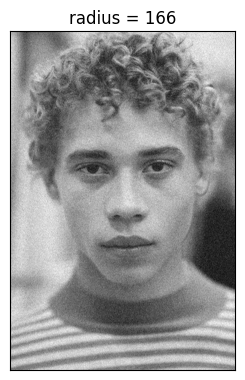

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack
from scipy import ndimage

# im = plt.imread('images/noisy.jpg').astype(float)
img = Image.open('images/noisy.jpg')

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

rows, cols = dft_shift.shape
crow, ccol = rows // 2, cols // 2  # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros_like(dft_shift)
mask[crow - 166:crow + 166, ccol - 166:ccol + 166] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift).real
# img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img_back, cmap='gray')
plt.title('radius = 166'), plt.xticks([]), plt.yticks([])

plt.show()

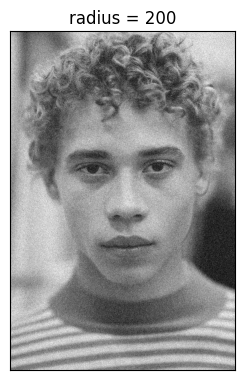

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack
from scipy import ndimage

# im = plt.imread('images/noisy.jpg').astype(float)
img = Image.open('images/noisy.jpg')

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

rows, cols = dft_shift.shape
crow, ccol = rows // 2, cols // 2  # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros_like(dft_shift)
mask[crow - 200:crow + 200, ccol - 200:ccol + 200] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift).real
# img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img_back, cmap='gray')
plt.title('radius = 200'), plt.xticks([]), plt.yticks([])

plt.show()